# Feature Engineering

Feature engineering is the process of using domain knowledge to extract feature from raw data. These features can be used to improve the performance of machine learning algorithms.

# Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

Types of feature scaling:

1. Standarization
2. Normalization

Standarization is also called as Z-score Normalization.

Geometric intution of standarization is centering the mean and scaling by the factor of standard deviation.

In [8]:
import pandas as pd #data preprocessing
import numpy as np  #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
 df = pd.read_csv('/content/Social_Network_Ads.csv')

In [10]:
# Select all rows and columns from the 3rd column onward (0-based indexing), and update the DataFrame.
# This effectively removes the first two columns from df.
df = df.iloc[:, 2:]


In [11]:
df.sample(5)

,Age,EstimatedSalary,Purchased
289,37,78000,1
220,41,80000,0
211,52,150000,1
82,20,49000,0
391,47,23000,1


#Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1),
                                                                df['Purchased'],
                                                                test_size=0.2,
                                                               random_state=0)
X_train.shape, X_test.shape

((320, 2), (80, 2))

# Standarad Scaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fitting the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform taina nd test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
scaler.mean_   #mean of age and salary respectively

array([3.8218750e+01, 6.9928125e+04])

In [18]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [19]:
X_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [20]:
# Convert the scaled training data back into a DataFrame and assign the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Convert the scaled test data back into a DataFrame and assign the original column names
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [21]:
X_train_scaled.sample(5)   #scaled value

,Age,EstimatedSalary
141,-0.021265,-0.142778
115,0.173157,0.233859
104,0.270367,0.291803
160,1.145264,-1.446521
130,-1.479426,0.349747


In [22]:
# Generate descriptive statistics for X_train and round the results to 1 decimal place
np.round(X_train.describe(), 1)


,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [24]:
# Generate descriptive statistics for the scaled training data and round the results to 1 decimal place
np.round(X_train_scaled.describe(), 1)


,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


# Effect of Scaling

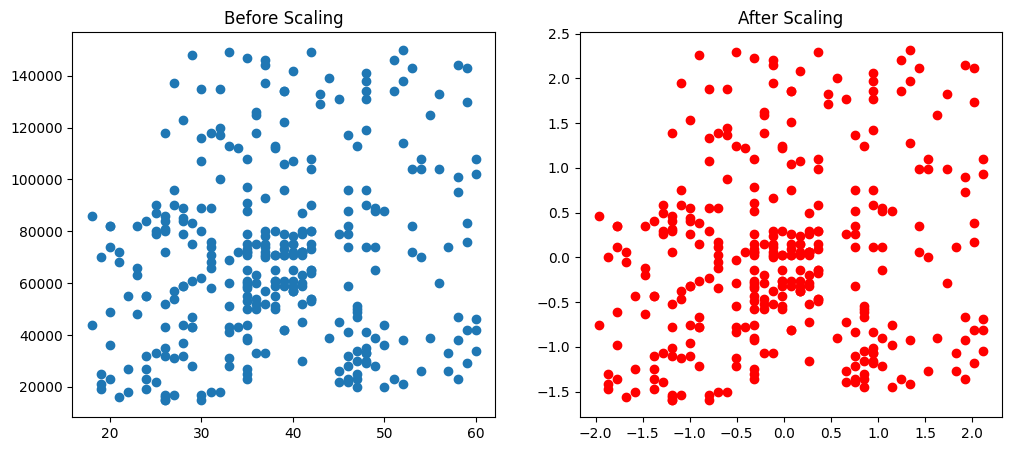

In [25]:

# Create a side-by-side subplot for before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot of original (unscaled) data
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

# Scatter plot of scaled data
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

# Display the plots
plt.show()


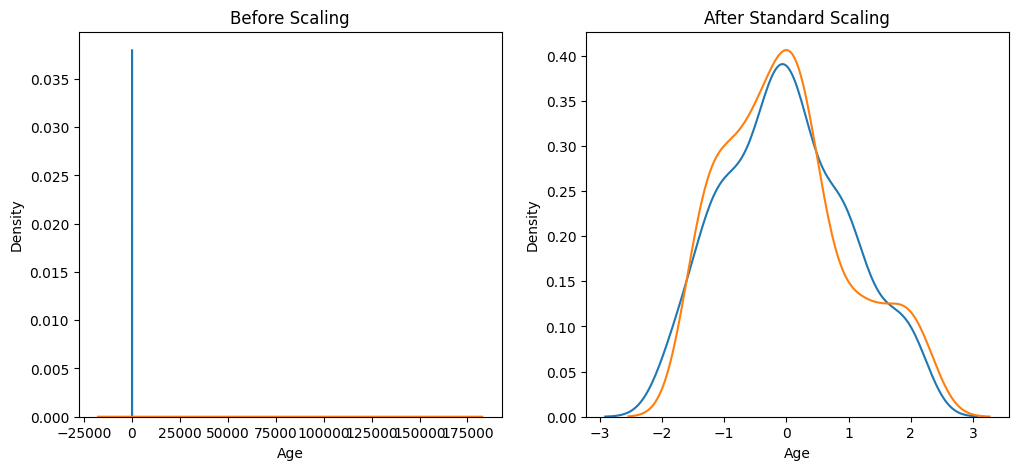

In [26]:
# Create a side-by-side subplot for before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# --- before scaling ---
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# --- after scaling ---
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

# Display the plots
plt.show()

# Comparison of Distribution

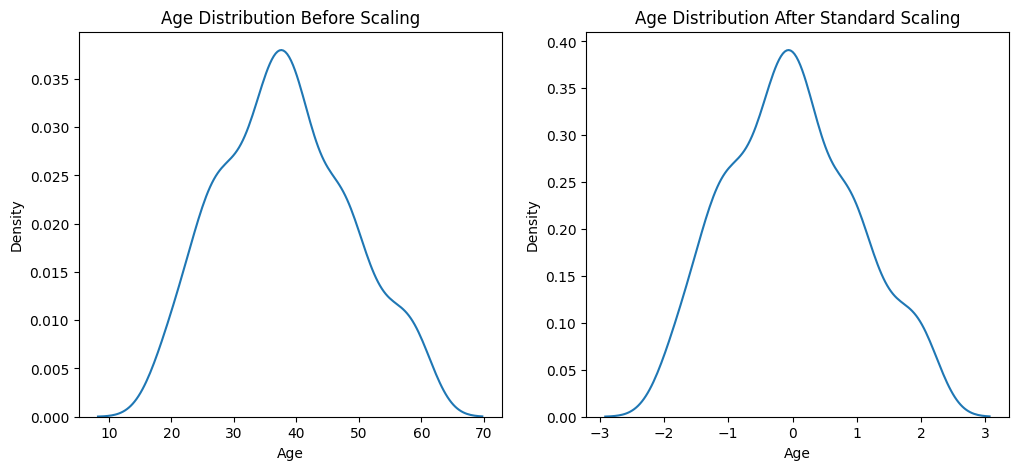

In [27]:
# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# --- before scaling ---
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# --- after scaling ---
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

# Show the plots
plt.show()

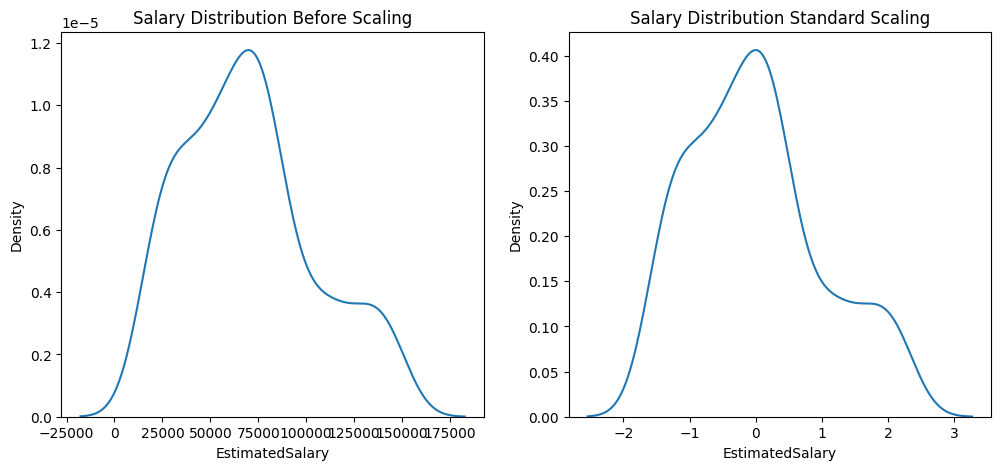

In [29]:
# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# --- before scaling ---
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# --- after scaling ---
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

# Show the plots
plt.show()

# Why Scaling is important ?

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [33]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [34]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print ("Actual", accuracy_score(Y_test,y_pred))
print ("Scaled", accuracy_score(Y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.925


# From Decisiontree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [40]:
dt.fit(X_train, Y_train)
dt_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [42]:
print ("Actual", accuracy_score(Y_test,y_pred))
print ("Scaled", accuracy_score(Y_test,y_pred_scaled))

Actual 0.8875
Scaled 0.9


In [43]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outliers

If the outlier is extremly than outlier behave as a outlier and then we have to handle the outlier explicitly.

# When to use standarization ?

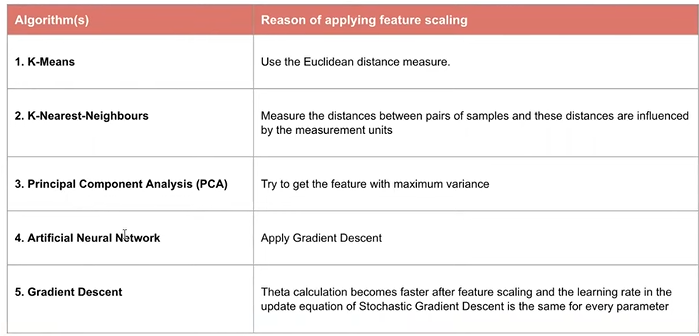